In [ ]:
!pip install dmba

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 62.6 MB/s eta 0:00:00


In [ ]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
import numpy as np

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.linear_model import LogisticRegression
from itertools import combinations
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from dmba import classificationSummary, gainsChart, liftChart
%matplotlib inline

Colab environment detected.


In [ ]:
path = '/content/drive/MyDrive/datasets/epl2020.exc.xlsx'

In [ ]:
corr = epl.corr()
plt.figure(figsize=(40,30))
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

NameError: ignored

In [ ]:
epl = pd.read_excel(path)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb


In [ ]:
clean= epl.drop(['deep', 'deep_allowed', 'scored', 'missed', 'pts', 'matchtime', 'ppda_cal', 'allowed_ppda', 'round', 'HS.x', 'HST.x', 'HF.x', 'HC.x', 'HY.x', 'HR.x', 'AS.x', 'AST.x', 'AF.x', 'AC.x', 'AY.x', 'AR.x', 'loses', 'draws','result','date','B365D.x','B365A.x','Referee.x', 'matchDay', 'teamId'], axis=1)

<ipython-input-10-bad58e5487b1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrclean = clean.corr()


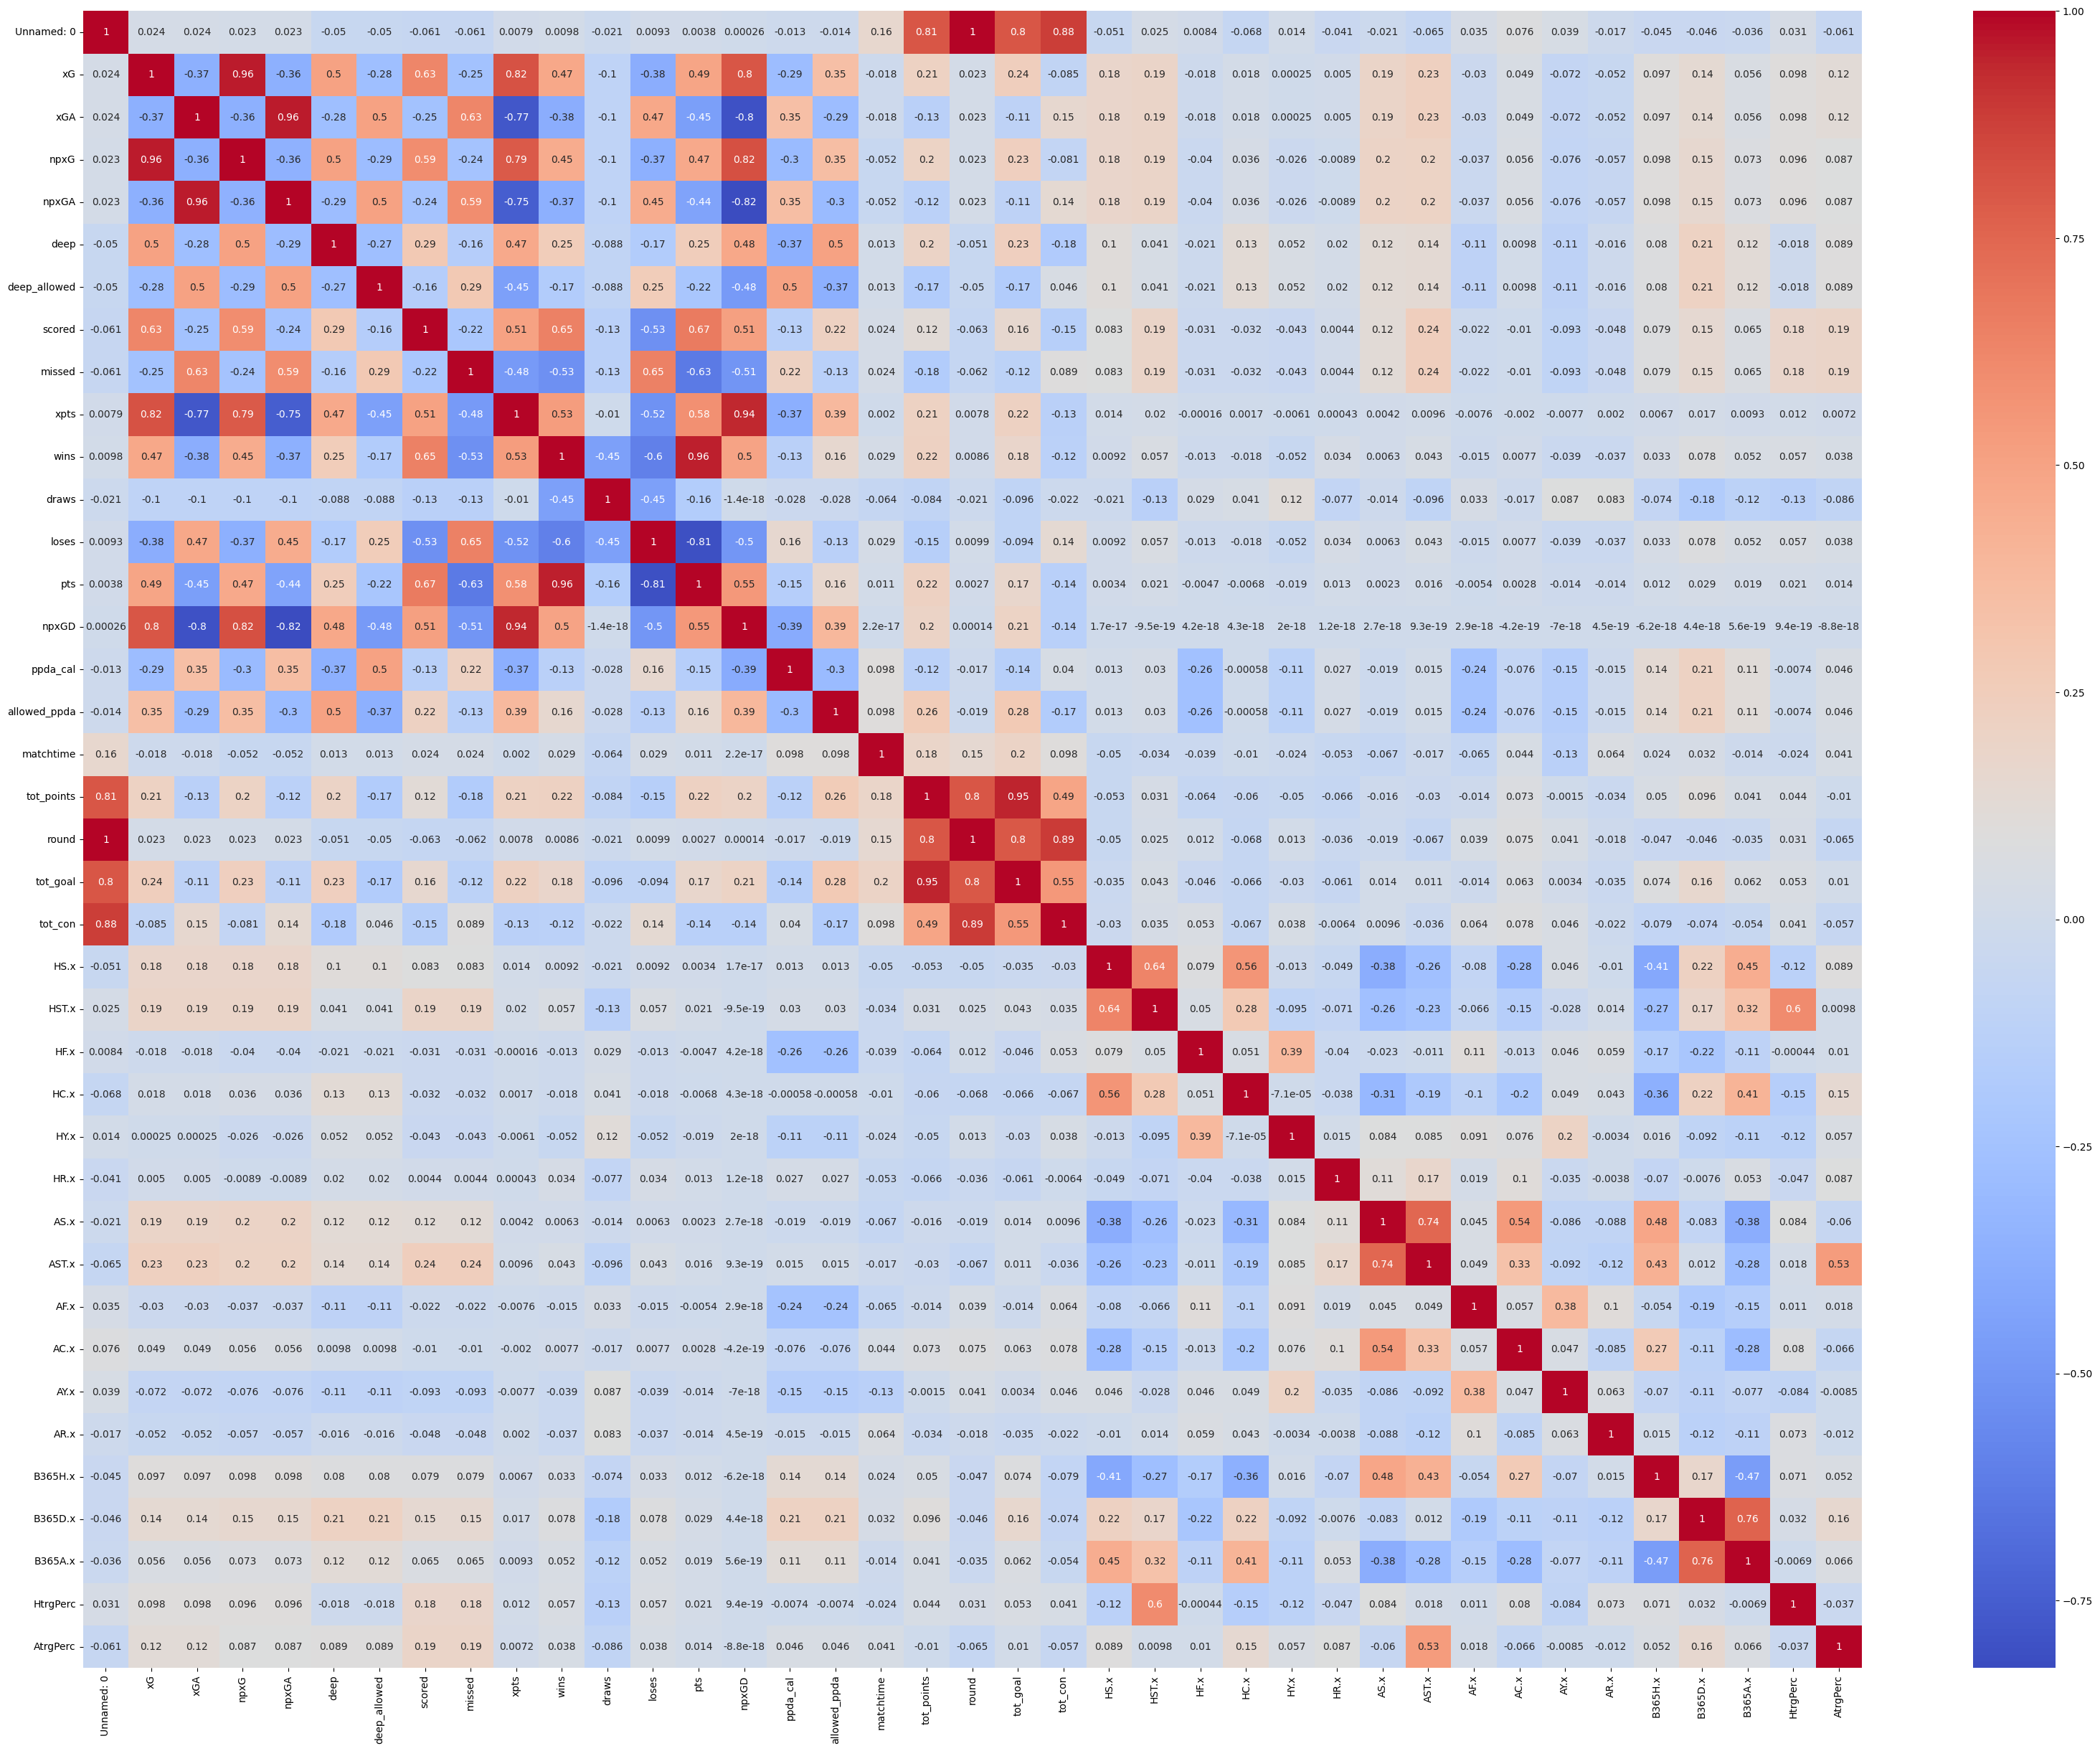

In [ ]:
corrclean = clean.corr()
plt.figure(figsize=(40,30))
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
sliced['h_a_h_a'] = sliced['h_a_h_a'].astype('category')
new_categories = {0: 'h', 1: 'a'}
sliced.h_a_h_a.cat.rename_categories(new_categories, inplace=True)

KeyError: ignored

In [ ]:
sliced = (clean[50:])

In [ ]:
sliced = pd.get_dummies(sliced, prefix_sep='_', drop_first=True)
y = sliced['h_a_h']
X = sliced.drop(columns=['h_a_h'])

In [ ]:
print(epl)

     Unnamed: 0 h_a        xG       xGA      npxG     npxGA  deep  \
0             1   h  2.234560  0.842407  2.234560  0.842407    11   
1             2   a  0.842407  2.234560  0.842407  2.234560     5   
2             3   a  3.183770  1.200300  2.422640  1.200300     9   
3             4   h  1.200300  3.183770  1.200300  2.422640     1   
4             5   h  1.340990  1.598640  1.340990  1.598640     4   
..          ...  ..       ...       ...       ...       ...   ...   
571         572   a  0.445922  2.028830  0.445922  2.028830     3   
572         573   a  0.585469  1.738900  0.585469  1.738900     2   
573         574   h  1.738900  0.585469  1.738900  0.585469     3   
574         575   a  0.672448  2.412390  0.672448  1.651220     2   
575         576   h  2.412390  0.672448  1.651220  0.672448     8   

     deep_allowed  scored  missed  ...  AF.x AC.x AY.x  AR.x  B365H.x  \
0               5       4       1  ...     9    2    2     0     1.14   
1              11       1

In [ ]:
print(sliced)

     Unnamed: 0        xG       xGA      npxG     npxGA    xpts  wins  \
50           51  2.293480  3.457680  2.293480  2.696510  0.6389     0   
51           52  3.457680  2.293480  2.696510  2.293480  2.1833     1   
52           53  0.985542  2.788210  0.985542  2.027040  0.3434     0   
53           54  2.788210  0.985542  2.027040  0.985542  2.5205     1   
54           55  1.893450  3.128560  1.893450  3.128560  0.6611     0   
..          ...       ...       ...       ...       ...     ...   ...   
571         572  0.445922  2.028830  0.445922  2.028830  0.2901     0   
572         573  0.585469  1.738900  0.585469  1.738900  0.3539     0   
573         574  1.738900  0.585469  1.738900  0.585469  2.4269     1   
574         575  0.672448  2.412390  0.672448  1.651220  0.2673     0   
575         576  2.412390  0.672448  1.651220  0.672448  2.5950     1   

        npxGD  tot_points  tot_goal  tot_con  B365H.x  HtrgPerc  AtrgPerc  \
50  -0.403030           0         1        7  

In [ ]:
print (sliced.describe())

       Unnamed: 0          xG         xGA        npxG       npxGA        xpts  \
count   526.00000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    313.50000    1.475448    1.475448    1.386012    1.386012    1.393639   
std     151.98739    0.886397    0.886397    0.811992    0.811992    0.879612   
min      51.00000    0.054134    0.054134    0.054134    0.054134    0.000400   
25%     182.25000    0.833538    0.833538    0.780614    0.780614    0.634325   
50%     313.50000    1.298345    1.298345    1.245635    1.245635    1.320800   
75%     444.75000    1.992962    1.992962    1.891412    1.891412    2.148625   
max     576.00000    6.630490    6.630490    5.869320    5.869320    2.999200   

             wins         npxGD  tot_points    tot_goal     tot_con  \
count  526.000000  5.260000e+02  526.000000  526.000000  526.000000   
mean     0.376426 -7.598485e-18   22.161597   22.652091   22.680608   
std      0.484950  1.342896e+00   13.759379   13.646652  

In [ ]:
X = sliced.drop(columns=['wins'])
Y = sliced['wins']

In [ ]:
print(X)

     Unnamed: 0        xG       xGA      npxG     npxGA    xpts     npxGD  \
50           51  2.293480  3.457680  2.293480  2.696510  0.6389 -0.403030   
51           52  3.457680  2.293480  2.696510  2.293480  2.1833  0.403030   
52           53  0.985542  2.788210  0.985542  2.027040  0.3434 -1.041498   
53           54  2.788210  0.985542  2.027040  0.985542  2.5205  1.041498   
54           55  1.893450  3.128560  1.893450  3.128560  0.6611 -1.235110   
..          ...       ...       ...       ...       ...     ...       ...   
571         572  0.445922  2.028830  0.445922  2.028830  0.2901 -1.582908   
572         573  0.585469  1.738900  0.585469  1.738900  0.3539 -1.153431   
573         574  1.738900  0.585469  1.738900  0.585469  2.4269  1.153431   
574         575  0.672448  2.412390  0.672448  1.651220  0.2673 -0.978772   
575         576  2.412390  0.672448  1.651220  0.672448  2.5950  0.978772   

     tot_points  tot_goal  tot_con  B365H.x  HtrgPerc  AtrgPerc  h_a_h  
50

In [ ]:
print(Y)

50     0
51     1
52     0
53     1
54     0
      ..
571    0
572    0
573    1
574    0
575    1
Name: wins, Length: 526, dtype: int64


In [ ]:
print(X)

     Unnamed: 0        xG       xGA      npxG     npxGA    xpts     npxGD  \
50           51  2.293480  3.457680  2.293480  2.696510  0.6389 -0.403030   
51           52  3.457680  2.293480  2.696510  2.293480  2.1833  0.403030   
52           53  0.985542  2.788210  0.985542  2.027040  0.3434 -1.041498   
53           54  2.788210  0.985542  2.027040  0.985542  2.5205  1.041498   
54           55  1.893450  3.128560  1.893450  3.128560  0.6611 -1.235110   
..          ...       ...       ...       ...       ...     ...       ...   
571         572  0.445922  2.028830  0.445922  2.028830  0.2901 -1.582908   
572         573  0.585469  1.738900  0.585469  1.738900  0.3539 -1.153431   
573         574  1.738900  0.585469  1.738900  0.585469  2.4269  1.153431   
574         575  0.672448  2.412390  0.672448  1.651220  0.2673 -0.978772   
575         576  2.412390  0.672448  1.651220  0.672448  2.5950  0.978772   

     tot_points  tot_goal  tot_con  HtrgPerc  AtrgPerc  h_a_h  
50         

In [ ]:
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.4, random_state=1)
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_Y)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print('AIC', AIC_score(valid_Y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  1.3639185446777031
       Unnamed: 0        xG       xGA      npxG     npxGA      xpts     npxGD  \
coeff    -0.01675  3.153044 -3.370894  0.240503  0.500641 -2.662645 -0.260138   

       tot_points  tot_goal  tot_con   B365H.x  HtrgPerc  AtrgPerc     h_a_h  
coeff    0.277885 -0.155586  0.12717  0.003259 -0.153139  1.217467  0.595446  
AIC 313.93113880974414


In [ ]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_Y,'p(0)': [p[0] for p in logit_reg_proba],'p(1)': [p[1] for p in logit_reg_proba],'predicted': logit_reg_pred })

# display four different cases
interestingCases = [350,300,400]
print(logit_result.loc[interestingCases])


     actual      p(0)      p(1)  predicted
350       1  0.169490  0.830510          1
300       0  0.661071  0.338929          0
400       0  0.253788  0.746212          1


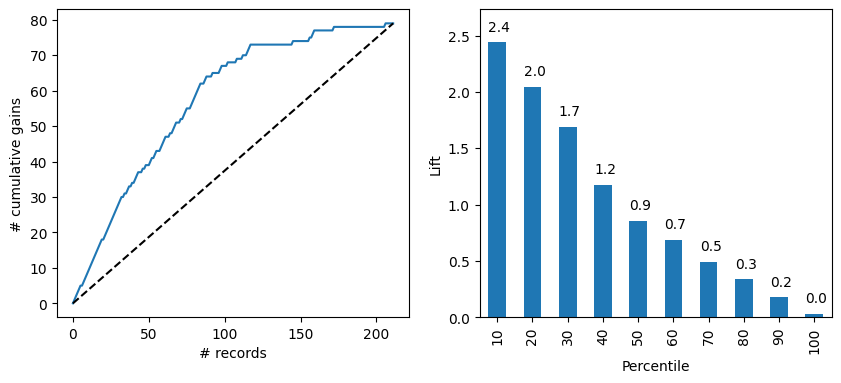

In [ ]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

In [ ]:
print("\nValidation Set: Confusion matrix\n")
classificationSummary(valid_Y, logit_reg_pred)


Validation Set: Confusion matrix

Confusion Matrix (Accuracy 0.7773)

       Prediction
Actual   0   1
     0 113  19
     1  28  51


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(valid_Y, logit_reg_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       132
           1       0.73      0.65      0.68        79

    accuracy                           0.78       211
   macro avg       0.76      0.75      0.76       211
weighted avg       0.77      0.78      0.77       211



With Feature Scaling


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=1)

In [ ]:
#classifier = pd.DataFrame({'actual': valid_Y,'p(0)': [p[0] for p in logit_reg_proba],'p(1)': [p[1] for p in logit_reg_proba],'predicted': logit_reg_pred })

In [ ]:
print(Y_train)

236    1
394    1
526    1
562    0
484    0
      ..
179    1
194    0
122    0
285    1
87     1
Name: wins, Length: 315, dtype: int64


In [ ]:
print(X_train)

[[-0.49496623  2.52464548 -0.3703855  ...  1.14576914 -0.13214262
   1.01600102]
 [ 0.53831548  0.07181228 -1.25961074 ... -0.32147337 -0.9590706
   1.01600102]
 [ 1.40156348  0.37167802 -1.48960392 ...  0.98967951 -0.6489726
   1.01600102]
 ...
 [-1.24049859 -0.58285222  0.24709164 ... -1.05899686 -0.33887461
   1.01600102]
 [-0.1745181   0.62343453 -0.68587027 ...  0.0718725  -0.13214262
   1.01600102]
 [-1.46939011 -0.37189324 -1.14952809 ...  0.98967951 -0.13214262
   1.01600102]]


In [ ]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)

[[113  19]
 [ 24  55]]


0.7962085308056872

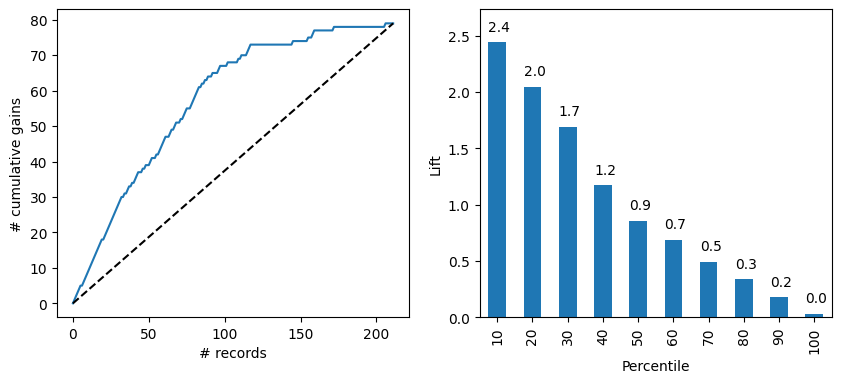

In [ ]:
df = classifier.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

In [ ]:
train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.4, random_state=1)

In [ ]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegression()
    model.fit(train_X[variables], train_Y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_Y, [train_Y.mean()] * len(train_Y), model, df=1)
    return AIC_score(train_Y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Unnamed: 0, xG, xGA, npxG, npxGA, xpts, npxGD, tot_points, tot_goal, tot_con, HtrgPerc, AtrgPerc, h_a_h
Start: score=441.84, constant
Step: score=441.84, add None
[]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       132
           1       0.74      0.70      0.72        79

    accuracy                           0.80       211
   macro avg       0.78      0.78      0.78       211
weighted avg       0.79      0.80      0.79       211

